In [1]:
import pandas as pd
import numpy as np
fashion1 = pd.read_csv('../data604/fasion_mnist/fashion-mnist_train.csv')
fashion2 = pd.read_csv('../data604/fasion_mnist/fashion-mnist_test.csv')

In [2]:
fashion1.info()
fashion2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


In [3]:
#merge the two fashion data sets
fashion_data = fashion1.append(fashion2, ignore_index=True)

In [4]:
fashion_data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
69996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
69997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
69998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

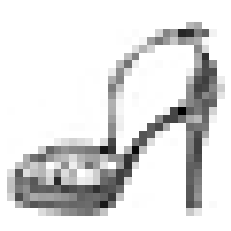

In [6]:
#plot one image per class
image = fashion_data.loc[fashion_data['label']==5].to_numpy()[1,1:].reshape(28,28)
plt.imshow(image, cmap='binary')
plt.axis('off')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

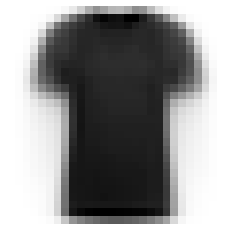

In [7]:
#plot mean images of the same class
mean_image = np.mean(fashion_data.loc[fashion_data['label']==0].to_numpy()[:,1:], axis=0).reshape(28,28)
plt.imshow(mean_image, cmap='binary')
plt.axis('off')
plt.show

In [8]:
#build a function for knn classifier, the default metrics is euclidean.
from sklearn.neighbors import KNeighborsClassifier
def knn_20(train, test, dist='euclidean'):
    train_label = train['label'].copy()
    train_nl = train.copy().drop(columns=['label'])
    test_label = test['label'].copy()
    test_nl = test.copy().drop(columns=['label'])
    neigh = KNeighborsClassifier(n_neighbors=20, metric=dist)
    neigh.fit(train_nl, train_label)
    predict=neigh.predict(test_nl)
    return predict

In [105]:
#build a function for train test split by class.
def tts_by_class(n): 
    train = fashion_data.loc[fashion_data['label']==0].sample(n)
    for i in range(1,10):
        train_row = fashion_data.loc[fashion_data['label']==i].sample(n)
        train = train.append(train_row)
    test = fashion_data.loc[fashion_data.index.difference(train.index)]
    return train, test

In [106]:
t_train, t_test = tts_by_class(500)

In [107]:
#count the value of different classes
t_train['label'].value_counts()

0    500
4    500
8    500
1    500
5    500
9    500
2    500
6    500
3    500
7    500
Name: label, dtype: int64

In [14]:
%%time
#mesure the time for running a knn classifier with a total of 5,000 training data.
ts_predict = knn_20(t_train,t_test)

CPU times: user 43.5 s, sys: 4.11 s, total: 47.6 s
Wall time: 11.8 s


In [22]:
#build a function to print accuracy.
import json
def print_acc(predict, test):
    test_label = test['label'].copy()
    global_acc=sum(predict==np.array(test_label))/len(test)
    class_acc={}
    test_wp=test.copy()
    test_wp['predict'] = predict.tolist()
    for i in range(10):
        c = test_wp.loc[test['label']==i]
        accuracy=sum(np.array(c['label'])==c['predict'])/len(c)
        class_acc.update({str(i):accuracy})
    sorted_class_acc = {}
    sorted_keys = sorted(class_acc, key=class_acc.get)
    for j in sorted_keys:
        sorted_class_acc[j] = class_acc[j]
    print("global_acc: ", global_acc)
    print("class_acc: ") 
    print (json.dumps(sorted_class_acc, indent=2))

In [72]:
print_acc(ts_predict, t_test)

global_acc:  0.7960307692307692
class_acc: 
{
  "6": 0.4673846153846154,
  "4": 0.705076923076923,
  "5": 0.7063076923076923,
  "2": 0.726,
  "3": 0.8224615384615385,
  "0": 0.8593846153846154,
  "8": 0.8730769230769231,
  "7": 0.9135384615384615,
  "1": 0.9375384615384615,
  "9": 0.9495384615384616
}


In [151]:
cal_time1 = []
acc_vs_size1 = []
class_N = list(range(10,6500,10))
for i in class_N:
    start_time = time.time()
    train_t, test_t = tts_by_class(i)
    predict = knn_20(train_t,test_t)
    global_acc=sum(np.array(predict)==np.array(test_t['label']))/len(test_t)
    end_time = time.time()
    acc_vs_size1.append(global_acc)
    cal_time1.append(end_time-start_time)

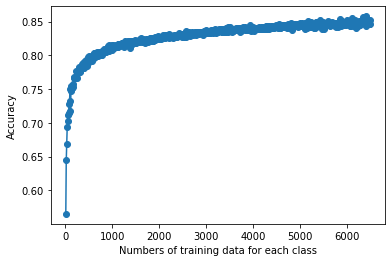

In [152]:
plt.plot(class_N, acc_vs_size1,'-o')
plt.xlabel("Numbers of training data for each class")
plt.ylabel("Accuracy")
plt.show()

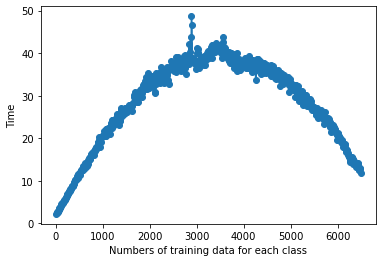

In [154]:
plt.xlabel("Numbers of training data for each class")
plt.ylabel("Time")
plt.plot(class_N, cal_time1,'-o')

In [28]:
#Split the data with 1,000 examples per class to training set and remaining to testing set.
train_c, test_c = tts_by_class(3000)

In [29]:
train_c['label'].value_counts()

0    3000
1    3000
2    3000
3    3000
4    3000
5    3000
6    3000
7    3000
8    3000
9    3000
Name: label, dtype: int64

In [30]:
%%time
#Messure the time for the prediction
predict_c = knn_20(train_c, test_c)

CPU times: user 2min 32s, sys: 13.9 s, total: 2min 46s
Wall time: 36.8 s


In [31]:
print_acc(predict_c, test_c)

global_acc:  0.83355
class_acc: 
{
  "6": 0.54925,
  "4": 0.74525,
  "2": 0.77625,
  "5": 0.7765,
  "3": 0.851,
  "0": 0.86275,
  "8": 0.92575,
  "7": 0.939,
  "1": 0.95075,
  "9": 0.959
}


In [128]:
test_c['label'].value_counts()

0    4000
1    4000
2    4000
3    4000
4    4000
5    4000
6    4000
7    4000
8    4000
9    4000
Name: label, dtype: int64

In [32]:
#test how much time it cost for p
ts_rand_train = fashion_data.sample(5000)
ts_rand_test = fashion_data.loc[fashion_data.index.difference(ts_rand_train.index)]

In [35]:
%%time
ts_rand_pred = knn_20(ts_rand_train, ts_rand_test)

CPU times: user 43.5 s, sys: 3.73 s, total: 47.2 s
Wall time: 11.8 s


In [145]:
rand_cal_time1 = []
rand_acc_vs_size1 = []
train_N = list(range(100,65000,100))
for i in train_N:
    start_time = time.time()
    rand_train = fashion_data.sample(i)
    rand_test = fashion_data.loc[fashion_data.index.difference(rand_train.index)]
    predict = knn_20(rand_train,rand_test)
    global_acc=sum(np.array(predict)==np.array(rand_test['label']))/len(rand_test)
    end_time = time.time()
    rand_acc_vs_size1.append(global_acc)
    rand_cal_time1.append(end_time-start_time)

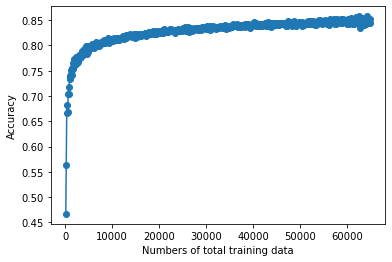

In [147]:
plt.plot(train_N, rand_acc_vs_size1,'-o')
plt.xlabel("Numbers of total training data")
plt.ylabel("Accuracy")
plt.show()

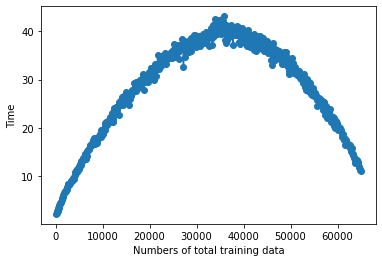

In [149]:
plt.xlabel("Numbers of total training data")
plt.ylabel("Time")
plt.plot(train_N, rand_cal_time1,'-o')

In [42]:
rand_train = fashion_data.sample(30000)
rand_test = fashion_data.loc[fashion_data.index.difference(rand_train.index)]

In [43]:
rand_train['label'].value_counts()

1    3042
8    3041
2    3038
4    3032
6    3022
7    3000
0    2989
5    2988
3    2936
9    2912
Name: label, dtype: int64

In [46]:
%%time
rand_predict = knn_20(rand_train, rand_test)

CPU times: user 2min 32s, sys: 14 s, total: 2min 46s
Wall time: 37.9 s


In [47]:
print_acc(rand_predict, rand_test)

global_acc:  0.833125
class_acc: 
{
  "6": 0.5356963298139769,
  "4": 0.743195564516129,
  "5": 0.7619641076769691,
  "2": 0.7811711256940939,
  "3": 0.8540846456692913,
  "0": 0.8745948641236599,
  "8": 0.9353372063652438,
  "7": 0.9355,
  "1": 0.9471955533097524,
  "9": 0.958904109589041
}


In [129]:
rand_test['label'].value_counts()

9    4088
3    4064
5    4012
0    4011
7    4000
6    3978
4    3968
2    3962
8    3959
1    3958
Name: label, dtype: int64

In [48]:
%%time 
#Using Manhattan distance instead of Euclidean distance to calculate the knn
predict_c_man = knn_20(train_c, test_c, dist='manhattan')

CPU times: user 13min 57s, sys: 9.38 s, total: 14min 6s
Wall time: 14min 8s


In [49]:
print_acc(predict_c_man, test_c)

global_acc:  0.840925
class_acc: 
{
  "6": 0.529,
  "4": 0.744,
  "2": 0.773,
  "5": 0.8495,
  "3": 0.867,
  "0": 0.87,
  "8": 0.92675,
  "7": 0.93875,
  "1": 0.954,
  "9": 0.95725
}


In [50]:
#calculate euclidean distance
def my_knn20_eu(train,test):
    train_label = train['label'].copy()
    train = train.drop(columns=['label'])
    test_label = test['label'].copy()
    test = test.drop(columns=['label'])
    predict_labels = []
    n=len(test)
    train=train.to_numpy()
    test=test.to_numpy()
    for i in range(n):
        dists_eu = np.sqrt(np.sum((train - test[i])**2,axis=-1))
        k_20 = np.argpartition(dists_eu,20)[:20]
        label_20 = train_label.iloc[k_20].tolist()
        predict_label = max(label_20,key=label_20.count)
        predict_labels.append(predict_label)
    accuracy_rate = sum(np.array(predict_labels)==np.array(test_label[:n]))/n
    return accuracy_rate, dists_eu

In [56]:
#calculate manhattan distance
def my_knn20_man(train,test):
    train_label = train['label'].copy()
    train = train.drop(columns=['label'])
    test_label = test['label'].copy()
    test = test.drop(columns=['label'])
    predict_labels = []
    n=len(test)
    train=train.to_numpy()
    test=test.to_numpy()
    for i in range(n):
        dists_eu = np.sum(abs(train - test[i]),axis=-1)
        k_20 = np.argpartition(dists_eu,20)[:20]
        label_20 = train_label.iloc[k_20].tolist()
        predict_label = max(label_20,key=label_20.count)
        predict_labels.append(predict_label)
    accuracy_rate = sum(np.array(predict_labels)==np.array(test_label[:n]))/n
    return accuracy_rate, dists_eu

In [54]:
accuracy_eu, dists_eu = my_knn20_eu(t_train,t_test)

In [57]:
accuracy_man, dists_man = my_knn20_man(t_train,t_test)

In [60]:
dists_eu

array([3444.97547161, 4076.40380728, 3704.76139583, ..., 1804.50990576,
       1336.62186126, 3163.78839368])

In [61]:
dists_man

array([71302, 83824, 77463, ..., 25316, 19028, 54293])

In [113]:
#create a new training set with different proportion of classes
test_acc_train = fashion_data.loc[fashion_data['label']==0].sample(1000)
for i in [1,3,7,8,9]:
    add_row = fashion_data.loc[fashion_data['label']==i].sample(1000)
    test_acc_train = test_acc_train.append(add_row)
for i in [6,4,2,5]:
    add_row2 = fashion_data.loc[fashion_data['label']==i].sample(6000)
    test_acc_train = test_acc_train.append(add_row2)

In [114]:
test_acc_train['label'].value_counts()   

2    6000
4    6000
5    6000
6    6000
0    1000
1    1000
3    1000
7    1000
8    1000
9    1000
Name: label, dtype: int64

In [115]:
test_acc_test = fashion_data.loc[fashion_data.index.difference(test_acc_train.index)]

In [116]:
predict_test_acc = knn_20(test_acc_train, test_acc_test)

In [117]:
print_acc(predict_test_acc, test_acc_test)

global_acc:  0.81295
class_acc: 
{
  "0": 0.5586666666666666,
  "3": 0.6993333333333334,
  "6": 0.717,
  "4": 0.789,
  "2": 0.811,
  "8": 0.858,
  "7": 0.8843333333333333,
  "5": 0.915,
  "1": 0.9315,
  "9": 0.9491666666666667
}


In [118]:
test_acc_train2 = fashion_data.loc[fashion_data['label']==0].sample(3000)
for i in [1,3,7,8,9]:
    add_row2 = fashion_data.loc[fashion_data['label']==i].sample(3000)
    test_acc_train2 = test_acc_train2.append(add_row2)
for i in [6,4,2,5]:
    add_row2 = fashion_data.loc[fashion_data['label']==i].sample(6000)
    test_acc_train2 = test_acc_train2.append(add_row2)

In [119]:
test_acc_test2 = fashion_data.loc[fashion_data.index.difference(test_acc_train2.index)]

In [110]:
test_acc_train2['label'].value_counts()

2    6000
4    6000
5    6000
6    6000
0    3000
1    3000
3    3000
7    3000
8    3000
9    3000
Name: label, dtype: int64

In [120]:
predict_test_acc2 = knn_20(test_acc_train2, test_acc_test2)

In [121]:
print_acc(predict_test_acc2, test_acc_test2)

global_acc:  0.8745714285714286
class_acc: 
{
  "6": 0.659,
  "0": 0.7685,
  "4": 0.784,
  "2": 0.791,
  "3": 0.818,
  "5": 0.842,
  "8": 0.92275,
  "7": 0.939,
  "1": 0.94775,
  "9": 0.957
}


In [122]:
test_acc_train3, test_acc_test3 = tts_by_class(6000)

In [90]:
test_acc_train3['label'].value_counts()

0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
Name: label, dtype: int64

In [91]:
predict_test_acc3 = knn_20(test_acc_train3, test_acc_test3)

In [92]:
print_acc(predict_test_acc3, test_acc_test3)

global_acc:  0.8473
class_acc: 
{
  "6": 0.566,
  "5": 0.778,
  "2": 0.789,
  "4": 0.797,
  "0": 0.865,
  "3": 0.883,
  "7": 0.937,
  "8": 0.942,
  "1": 0.954,
  "9": 0.962
}
